In [1]:
import os; os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = (224, 224)

train_ds = keras.utils.image_dataset_from_directory(
    'data/cats_dogs/',
    batch_size=16,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset='training')

val_ds = keras.utils.image_dataset_from_directory(
    'data/cats_dogs/',
    batch_size=16,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset='validation')

Found 25000 files belonging to 2 classes.
Using 17500 files for training.
Found 25000 files belonging to 2 classes.
Using 7500 files for validation.


In [3]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip(),
        keras.layers.RandomRotation(0.2),
        keras.layers.RandomContrast(0.5),
        keras.layers.RandomBrightness(0.5)
    ]
)

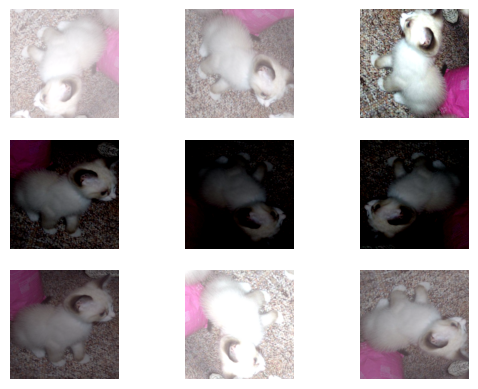

In [4]:
plt.figure(1)

for images, labels in train_ds.take(1):
    or_img = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        augm_img = data_augmentation(
            tf.expand_dims(or_img, 0),
            training=True)
        plt.imshow(augm_img[0].numpy().astype('uint8'))
        plt.axis('off')

In [5]:
base_model = keras.applications.MobileNetV3Small(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False
)

base_model.trainable = False

# sequential
model = keras.Sequential()
model.add(keras.layers.Lambda(keras.applications.mobilenet_v3.preprocess_input, input_shape=(224, 224, 3)))
model.add(data_augmentation)
model.add(base_model)
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1))

model.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.Precision(),
        keras.metrics.Recall()
    ]
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='checkpoints/checkpoints',
        save_weights_only=True,
        monitor='val_binary_accuracy',
        save_best_only=True),
    keras.callbacks.EarlyStopping(
        monitor='val_binary_accuracy',
        min_delta=0.1,
        patience=3,
        restore_best_weights=True),
    keras.callbacks.TensorBoard(log_dir='logs')
]

model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks)

Epoch 1/20
1094/1094 [==============================] - 168s 151ms/step - loss: 1.0841 - binary_accuracy: 0.8535 - precision: 0.8592 - recall: 0.8440 - val_loss: 0.5838 - val_binary_accuracy: 0.9385 - val_precision: 0.9784 - val_recall: 0.8980
Epoch 2/20
1094/1094 [==============================] - 168s 154ms/step - loss: 1.3082 - binary_accuracy: 0.8729 - precision: 0.8767 - recall: 0.8665 - val_loss: 0.5450 - val_binary_accuracy: 0.9492 - val_precision: 0.9673 - val_recall: 0.9308
Epoch 3/20
1094/1094 [==============================] - 166s 151ms/step - loss: 1.3332 - binary_accuracy: 0.8821 - precision: 0.8848 - recall: 0.8773 - val_loss: 0.6041 - val_binary_accuracy: 0.9573 - val_precision: 0.9405 - val_recall: 0.9773
Epoch 4/20
1094/1094 [==============================] - 167s 153ms/step - loss: 1.5744 - binary_accuracy: 0.8771 - precision: 0.8790 - recall: 0.8734 - val_loss: 0.5689 - val_binary_accuracy: 0.9569 - val_precision: 0.9532 - val_recall: 0.9620
